In [1]:
import os
import rasterio
import numpy as np
import pickle
import csv
import sys
sys.path.append('/home/james/PycharmProjects/field-delineation')
from eolearn.core import EOPatch
from fd.utils_plot import draw_true_color, draw_bbox, draw_vector_timeless, draw_mask
import matplotlib.pyplot as plt
import pprint

In [2]:
def describe_eopatch(pth_to_eopatch):
    print(pth_to_eopatch)
    if os.path.exists(pth_to_eopatch):
        eopatch_bands_fn = os.path.join(pth_to_eopatch, 'data', 'BANDS.npy')
        if os.path.exists(eopatch_bands_fn):
            bands_data = np.load(eopatch_bands_fn)
            print('eopatch_bands_data:')
            print(type(bands_data))
            print(bands_data.shape)
            print('\n')

        eopatch_clp_fn = os.path.join(pth_to_eopatch, 'data', 'CLP.npy')
        if os.path.exists(eopatch_clp_fn):
            clp_data = np.load(eopatch_clp_fn)
            print('eopatch_clp_data:')
            print(type(clp_data))
            print(clp_data.shape)
            print('\n')

        eopatch_clm_fn = os.path.join(pth_to_eopatch, 'mask', 'CLM.npy')
        if os.path.exists(eopatch_clm_fn):
            clm_data = np.load(eopatch_clm_fn)
            print('eopatch_clm_data:')
            print(type(clm_data))
            print(clm_data.shape)
            print('\n')        

        eopatch_is_data_fn = os.path.join(pth_to_eopatch, 'mask', 'IS_DATA.npy')
        if os.path.exists(eopatch_is_data_fn):
            is_data_data = np.load(eopatch_is_data_fn)
            print('eopatch_is_data_data:')
            print(type(is_data_data))
            print(is_data_data.shape)
            print('\n')      

        bbox_pkl_fn = os.path.join(pth_to_eopatch, 'bbox.pkl')
        if os.path.exists(bbox_pkl_fn):
            print('bbox_pkl_fn:{0}'.format(bbox_pkl_fn))
            with open(bbox_pkl_fn, 'rb') as inpf:
                bbox = pickle.load(inpf)
                print(bbox)

        timestamp_pkl_fn = os.path.join(pth_to_eopatch, 'timestamp.pkl')
        if os.path.exists(timestamp_pkl_fn):
            print('timestamp_pkl_fn:{0}'.format(timestamp_pkl_fn))
            with open(timestamp_pkl_fn, 'rb') as inpf:
                ts = pickle.load(inpf)
                print(ts)
        print('\n\n')
                
def describe_eopatch_vector_raster(pth_to_eopatch):
    distance_fn = os.path.join(pth_to_eopatch, 'data_timeless', 'DISTANCE.npy')
    if os.path.exists(distance_fn):
        distance_data = np.load(distance_fn)
        print('distance_data:')
        print(type(distance_data))
        print(distance_data.shape)
        print('\n')        
        
    boundary_fn = os.path.join(pth_to_eopatch, 'mask_timeless', 'BOUNDARY.npy')
    if os.path.exists(boundary_fn):
        boundary_data = np.load(boundary_fn)
        print('boundary_data:')
        print(type(boundary_data))
        print(boundary_data.shape)
        print('\n')        
        
    extent_fn = os.path.join(pth_to_eopatch, 'mask_timeless', 'EXTENT.npy')
    if os.path.exists(extent_fn):
        extent_data = np.load(extent_fn)
        print('extent_data:')
        print(type(extent_data))
        print(extent_data.shape)
        print('\n')        
        
    gsaa_original_fn = os.path.join(pth_to_eopatch, 'vector_timeless', 'GSAA_ORIGINAL.pkl')     
    if os.path.exists(gsaa_original_fn):
        print(gsaa_original_fn)
        
        
def describe_patchlets(pth_to_patchlets, write_patchlet_bboxes=False, patchlet_bbox_fn=None):
    patchlet_bboxes = {}
    
    for root, folders, files in os.walk(pth_to_patchlets):
        for fld in folders:
            if 'VNH' in fld:
                pth_to_patchlet = os.path.join(root, fld)
                print('PATCHLET: ', pth_to_patchlet, '\n')
                # inspect the patchlets bands
                patchlet_bands_fn = os.path.join(pth_to_patchlet, 'data', 'BANDS.npy')
                if os.path.exists(patchlet_bands_fn):
                    patchlet_bands_data = np.load(patchlet_bands_fn)
                    print('patchlet_bands_data:')
                    print(type(patchlet_bands_data))
                    print(patchlet_bands_data.shape)
                    print('\n')
                    
                patchlet_distance_fn = os.path.join(pth_to_patchlet, 'data_timeless', 'DISTANCE.npy')
                if os.path.exists(patchlet_distance_fn):
                    patchlet_distance_data = np.load(patchlet_distance_fn)
                    print('patchet_distance_data:')
                    print(type(patchlet_distance_data))
                    print(patchlet_distance_data.shape)
                    print('\n')
                    
                patchlet_boundary_fn = os.path.join(pth_to_patchlet, 'mask_timeless', 'BOUNDARY.npy')
                if os.path.exists(patchlet_boundary_fn):
                    patchlet_boundary_data = np.load(patchlet_boundary_fn)
                    print('patchet_boundary_data:')
                    print(type(patchlet_boundary_data))
                    print(patchlet_boundary_data.shape)
                    print('\n')                    
                    
                patchlet_extent_fn = os.path.join(pth_to_patchlet, 'mask_timeless', 'EXTENT.npy')
                if os.path.exists(patchlet_extent_fn):
                    patchlet_extent_data = np.load(patchlet_extent_fn)
                    print('patchet_extent_data:')
                    print(type(patchlet_extent_data))
                    print(patchlet_extent_data.shape)
                    print('\n')
                
                #WTF is this?!
                patchlet_scalar_fn = os.path.join(pth_to_patchlet, 'scalar_timeless', 'PATCHLET_LOC.npy')    
                if os.path.exists(patchlet_scalar_fn):
                    patchlet_scalar_data = np.load(patchlet_scalar_fn)
                    print('patchet_scalar_data:')
                    print(type(patchlet_scalar_data))
                    print(patchlet_scalar_data.shape)
                    print('\n')                                
                
                # inspect the patchlet`s bbox
                pth_to_patchlet_bbox_pkl_fn = os.path.join(pth_to_patchlet, 'bbox.pkl')
                if os.path.exists(pth_to_patchlet_bbox_pkl_fn):
                    with open(pth_to_patchlet_bbox_pkl_fn, 'rb') as inpf:
                        bbox = pickle.load(inpf)
                        min_x, min_y, max_x, max_y = bbox.min_x, bbox.min_y, bbox.max_x, bbox.max_y
                        bbox_width = max_x - min_x
                        bbox_height = max_y - min_y
                        print('Patchlet BBOX: ', '{0},{1} {2},{3}'.format(min_x, min_y, max_x, max_y))
                        print('Patchlet BBOX Width:', bbox_width, 'Patchlet BBOX Height:', bbox_height)
                        print('\n')
                        if write_patchlet_bboxes:
                            patchlet_bboxes[pth_to_patchlet] = {
                                'min_x':min_x, 'min_y':min_y, 'max_x':max_x,'max_y':max_y
                            }
    if write_patchlet_bboxes:
        print(patchlet_bboxes)
        with open(patchlet_bbox_fn, 'w') as outpf:
            my_writer = csv.writer(outpf, delimiter=',', quotechar='"', quoting=csv.QUOTE_NONNUMERIC)
            my_writer.writerow(['pth_to_patchlet', 'min_x', 'min_y', 'max_x', 'max_y'])
            for p in patchlet_bboxes:
                p_info = patchlet_bboxes[p]
                my_writer.writerow([p, p_info['min_x'], p_info['min_y'], p_info['max_x'], p_info['max_y']])
                
def display_eopatch(eop):
    fig, ax = plt.subplots(ncols=3, figsize=(15, 15))
    draw_true_color(ax[0], eop, time_idx=0, factor=3.5/10000, feature_name='BANDS', bands=(2, 1, 0), grid=False)
    draw_bbox(ax[0], eop)
    draw_vector_timeless(ax[0], eop, vector_name='GSAA_ORIGINAL', alpha=.3)
    draw_true_color(ax[1], eop, time_idx=0, factor=3.5/10000, feature_name='BANDS', bands=(2, 1, 0), grid=False)
    draw_bbox(ax[1], eop)
    draw_mask(ax[1], eop, time_idx=None, feature_name='EXTENT', alpha=.3)
    draw_true_color(ax[2], eop, time_idx=0, factor=3.5/10000, feature_name='BANDS', bands=(2, 1, 0), grid=False)
    draw_bbox(ax[2], eop)
    draw_mask(ax[2], eop, time_idx=None, feature_name='BOUNDARY', alpha=.3)
    
def display_patchlet(patchlet):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
    #draw_true_color(ax[0], patchlet, time_idx=0, factor=3.5/10000, feature_name='BANDS', bands=(2, 1, 0), grid=False)
    draw_mask(ax[0], patchlet, time_idx=None, feature_name='EXTENT', alpha=1, grid=False)
    draw_mask(ax[1], patchlet, time_idx=None, feature_name='BOUNDARY', alpha=1, grid=False)
    
def display_eopatch_predictions(eop):
    tidx = 0  # select one timestamp 
    viz_factor = 3.5

    fig, axs = plt.subplots(figsize=(15, 5), ncols=3, sharey=True)
    #axs[0].imshow(viz_factor * my_eopatch_w_predictions.data['BANDS'][tidx][:500, :500, [2,1,0]]/10000)
    axs[0].imshow(viz_factor * eop.data['BANDS'][tidx][:200, :200, [2,1,0]]/10000)
    axs[0].set_title('RGB bands')
    #axs[1].imshow(my_eopatch_w_predictions.data['EXTENT_PREDICTED_folds_avg_10e'][tidx].squeeze()[:500, :500], vmin=0, vmax=1, alpha=.2)
    axs[1].imshow(eop.data['EXTENT_PREDICTED_folds_avg_10e'][tidx].squeeze()[:200, :200])
    axs[1].set_title('Extent')
    #axs[2].imshow(my_eopatch_w_predictions.data['BOUNDARY_PREDICTED_folds_avg_10e'][tidx].squeeze()[:500, :500], vmin=0, vmax=1, alpha=.2)
    axs[2].imshow(eop.data['BOUNDARY_PREDICTED_folds_avg_10e'][tidx].squeeze()[:200, :200])
    axs[2].set_title('Boundary')    

## Check the width/height of one of the input bands in rasterio

In [3]:
pth_to_src_tiff = '/home/james/Work/FieldBoundaries/input_data_110322/tiffs/30TWN_1/B02.tif'
if os.path.exists(pth_to_src_tiff):
    with rasterio.open(pth_to_src_tiff) as ds:
        print(ds.width, ds.height)

2974 2974


## After creating Patches

In [5]:
describe_eopatch(pth_to_eopatch='/home/james/Work/FieldBoundaries/input_data_110322/eopatches/30TWN_1')
describe_eopatch(pth_to_eopatch='/home/james/Work/FieldBoundaries/input_data_110322/eopatches/30TWN_2')
describe_eopatch(pth_to_eopatch='/home/james/Work/FieldBoundaries/input_data_110322/eopatches/30TWN_3')

/home/james/Work/FieldBoundaries/input_data_110322/eopatches/30TWN_1
eopatch_bands_data:
<class 'numpy.ndarray'>
(3, 2974, 2974, 4)


eopatch_clp_data:
<class 'numpy.ndarray'>
(3, 2974, 2974, 1)


eopatch_clm_data:
<class 'numpy.ndarray'>
(3, 2974, 2974, 1)


eopatch_is_data_data:
<class 'numpy.ndarray'>
(3, 2974, 2974, 1)


bbox_pkl_fn:/home/james/Work/FieldBoundaries/input_data_110322/eopatches/30TWN_1/bbox.pkl
568620.0,4695970.0,598360.0,4725710.0
timestamp_pkl_fn:/home/james/Work/FieldBoundaries/input_data_110322/eopatches/30TWN_1/timestamp.pkl
[datetime.datetime(2021, 8, 3, 0, 0, tzinfo=tzutc()), datetime.datetime(2021, 9, 5, 0, 0, tzinfo=tzutc()), datetime.datetime(2021, 11, 19, 0, 0, tzinfo=tzutc())]



/home/james/Work/FieldBoundaries/input_data_110322/eopatches/30TWN_2
eopatch_bands_data:
<class 'numpy.ndarray'>
(3, 2974, 2974, 4)


eopatch_clp_data:
<class 'numpy.ndarray'>
(3, 2974, 2974, 1)


eopatch_clm_data:
<class 'numpy.ndarray'>
(3, 2974, 2974, 1)


eopatch_is_data_data

## After running 3vector_raster.py

In [35]:
describe_eopatch_vector_raster(
    pth_to_eopatch='/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_1'
)
describe_eopatch_vector_raster(
    pth_to_eopatch='/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_2'
)
describe_eopatch_vector_raster(
    pth_to_eopatch='/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_3'
)

distance_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


boundary_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


extent_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_1/vector_timeless/GSAA_ORIGINAL.pkl
distance_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


boundary_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


extent_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_2/vector_timeless/GSAA_ORIGINAL.pkl
distance_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


boundary_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


extent_data:
<class 'numpy.ndarray'>
(1508, 1508, 1)


/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_3/vector_timeless/GSAA_ORIGINAL.pkl


## Display 1 of the eopatches

In [36]:
eopatch_fn='/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_1'

my_eopatch = None
if os.path.exists(eopatch_fn):
    my_eopatch = EOPatch.load(
        eopatch_fn
    )
    my_eopatch
    print(my_eopatch)

EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(1, 1508, 1508, 4), dtype=uint16)
    BOUNDARY_PREDICTED_folds_avg_10e: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=float32)
    CLP: numpy.ndarray(shape=(2, 1508, 1508, 1), dtype=float32)
    DISTANCE_PREDICTED_folds_avg_10e: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=float32)
    EXTENT_PREDICTED_folds_avg_10e: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=float32)
  }
  mask: {
    CLM: numpy.ndarray(shape=(2, 1508, 1508, 1), dtype=int8)
    IS_DATA: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=uint8)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    DISTANCE: numpy.ndarray(shape=(1508, 1508, 1), dtype=float32)
  }
  mask_timeless: {
    BOUNDARY: numpy.ndarray(shape=(1508, 1508, 1), dtype=uint8)
    EXTENT: numpy.ndarray(shape=(1508, 1508, 1), dtype=uint8)
  }
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {
    GSAA_ORIGINAL: geopandas.GeoDataFrame(columns=['UUID', 'FEAT_ID', 'FEAT_KODE', 'FEAT_T

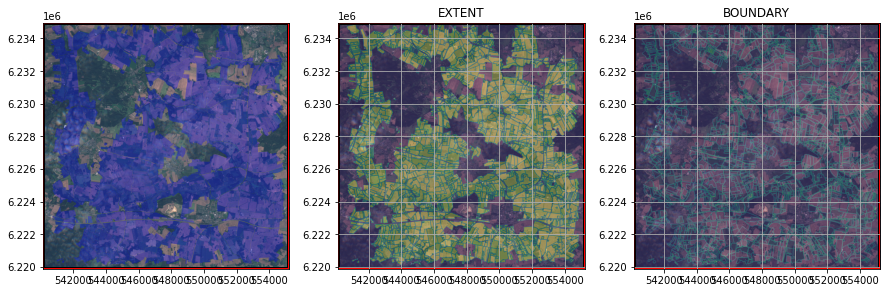

In [37]:
if my_eopatch is not None:
    display_eopatch(my_eopatch)

## After running 4patches.py

In [38]:
describe_patchlets(
    pth_to_patchlets='/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/patchlets',
    write_patchlet_bboxes=True,
    patchlet_bbox_fn='/home/james/Desktop/patchlets_bboxes.csv'
)

PATCHLET:  /home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/patchlets/32VNH_2_44 

patchlet_bands_data:
<class 'numpy.ndarray'>
(0, 256, 256, 4)


patchet_distance_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_boundary_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_extent_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_scalar_data:
<class 'numpy.ndarray'>
(3,)


Patchlet BBOX:  549080.0,6223550.0 551640.0,6226110.0
Patchlet BBOX Width: 2560.0 Patchlet BBOX Height: 2560.0


PATCHLET:  /home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/patchlets/32VNH_1_2 

patchlet_bands_data:
<class 'numpy.ndarray'>
(0, 256, 256, 4)


patchet_distance_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_boundary_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_extent_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_scalar_data:
<class 'numpy.ndarray'>
(3,)


Patchlet BBOX:  545570.0,6223680.0 548130.0,6226240.0
Patchlet BBOX Width: 2560.0 Patchlet BBO

patchlet_bands_data:
<class 'numpy.ndarray'>
(0, 256, 256, 4)


patchet_distance_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_boundary_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_extent_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_scalar_data:
<class 'numpy.ndarray'>
(3,)


Patchlet BBOX:  551480.0,6224110.0 554040.0,6226670.0
Patchlet BBOX Width: 2560.0 Patchlet BBOX Height: 2560.0


PATCHLET:  /home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/patchlets/32VNH_2_14 

patchlet_bands_data:
<class 'numpy.ndarray'>
(0, 256, 256, 4)


patchet_distance_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_boundary_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_extent_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_scalar_data:
<class 'numpy.ndarray'>
(3,)


Patchlet BBOX:  551150.0,6222800.0 553710.0,6225360.0
Patchlet BBOX Width: 2560.0 Patchlet BBOX Height: 2560.0


PATCHLET:  /home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/pat

patchet_extent_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_scalar_data:
<class 'numpy.ndarray'>
(3,)


Patchlet BBOX:  546890.0,6228400.0 549450.0,6230960.0
Patchlet BBOX Width: 2560.0 Patchlet BBOX Height: 2560.0


PATCHLET:  /home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/patchlets/32VNH_1_27 

patchlet_bands_data:
<class 'numpy.ndarray'>
(0, 256, 256, 4)


patchet_distance_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_boundary_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_extent_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_scalar_data:
<class 'numpy.ndarray'>
(3,)


Patchlet BBOX:  546560.0,6230140.0 549120.0,6232700.0
Patchlet BBOX Width: 2560.0 Patchlet BBOX Height: 2560.0


PATCHLET:  /home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/patchlets/32VNH_2_43 

patchlet_bands_data:
<class 'numpy.ndarray'>
(1, 256, 256, 4)


patchet_distance_data:
<class 'numpy.ndarray'>
(256, 256, 1)


patchet_boundary_data:
<class 'numpy.ndarra

## Display 1 of the patchlets

In [39]:
patchlet_fn='/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/patchlets/32VNH_2_44'
my_patchlet = None
if os.path.exists(patchlet_fn):
    my_patchlet = EOPatch.load(
        patchlet_fn
    )
    print(my_patchlet)

EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(0, 256, 256, 4), dtype=uint16)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    DISTANCE: numpy.ndarray(shape=(256, 256, 1), dtype=float32)
  }
  mask_timeless: {
    BOUNDARY: numpy.ndarray(shape=(256, 256, 1), dtype=uint8)
    EXTENT: numpy.ndarray(shape=(256, 256, 1), dtype=uint8)
  }
  scalar_timeless: {
    PATCHLET_LOC: numpy.ndarray(shape=(3,), dtype=int64)
  }
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: BBox(((549080.0, 6223550.0), (551640.0, 6226110.0)), crs=CRS('32632'))
  timestamp: []
)


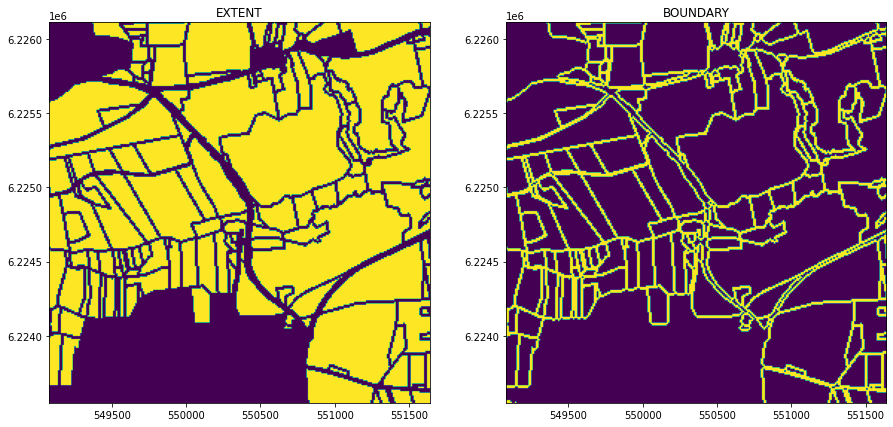

In [40]:
if my_patchlet is not None:
    display_patchlet(my_patchlet)

## After running 9predictEOpatches.py

In [71]:
eopatch_fn='/home/james/Work/FieldBoundaries/Sentinel-hub_fd/input-data/eopatches/32VNH_2'

my_eopatch_w_predictions = None
if os.path.exists(eopatch_fn):
    my_eopatch_w_predictions = EOPatch.load(
        eopatch_fn
    )
    print(my_eopatch_w_predictions)

EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(1, 1508, 1508, 4), dtype=uint16)
    BOUNDARY_PREDICTED_folds_avg_10e: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=float32)
    CLP: numpy.ndarray(shape=(2, 1508, 1508, 1), dtype=float32)
    DISTANCE_PREDICTED_folds_avg_10e: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=float32)
    EXTENT_PREDICTED_folds_avg_10e: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=float32)
  }
  mask: {
    CLM: numpy.ndarray(shape=(2, 1508, 1508, 1), dtype=int8)
    IS_DATA: numpy.ndarray(shape=(1, 1508, 1508, 1), dtype=uint8)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    DISTANCE: numpy.ndarray(shape=(1508, 1508, 1), dtype=float32)
  }
  mask_timeless: {
    BOUNDARY: numpy.ndarray(shape=(1508, 1508, 1), dtype=uint8)
    EXTENT: numpy.ndarray(shape=(1508, 1508, 1), dtype=uint8)
  }
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {
    GSAA_ORIGINAL: geopandas.GeoDataFrame(columns=['UUID', 'FEAT_ID', 'FEAT_KODE', 'FEAT_T

In [72]:
# (Tanimoto) loss for extent, boundary and distance transforms 
#  (lower=better)
# Accuracy - ratio of True Positives to True Negatives over all pixels 
#  (between 0 and 1, higher=better)
# MCC (Matthew`s correlation coefficient) for extent, boundary and distance transforms 
#  (ranges between -1 and 1, higher=better)
# IoU for extent, boundary and distance transforms
# (ranges between 0 and 1, higher=better)
meta_info_pkl_fn = os.path.join(eopatch_fn, 'meta_info.pkl')
if os.path.exists(meta_info_pkl_fn):
    with open(meta_info_pkl_fn, 'rb') as inpf:
        mi_dict = pickle.load(inpf)
        metrics = mi_dict['metrics_folds_avg_10e'][0]
        for metric in metrics:
            print('\t', metric, metrics[metric])

	 extent_loss 1.0015712
	 extent_acc 0.4857339
	 extent_iou 0.25
	 extent_mcc 0.0066718603
	 boundary_loss 1.061969
	 boundary_acc 0.87276304
	 boundary_iou 0.25
	 boundary_mcc 0.0
	 distance_loss 0.90722364
	 distance_acc 0.84770966
	 distance_iou 0.3698183
	 distance_mcc -0.0010021296


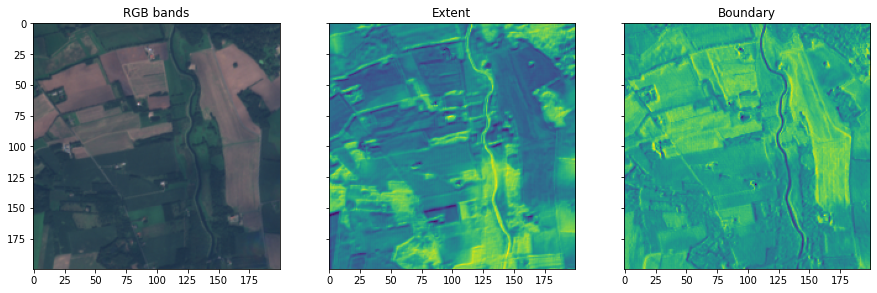

In [73]:
if my_eopatch_w_predictions is not None:
    display_eopatch_predictions(my_eopatch_w_predictions)

## After running 10postProcessPredictions.py

## After running 11createVectors.py